# A Walk Through Linear Models
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement a whole bunch of **linear classifiers**
- compare their performance and properties

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked. 

In [6]:
# some basic imports
import numpy as np
import scipy
import matplotlib.pyplot as plt
from mkdata import mkdata
from plotdata import plotdata

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


You can use this skeleton or write your own.

NOTE: Be becareful that the bias term is in the first element of weight, that is `y = np.sign(np.matmul(w_g.T, np.vstack((np.ones((1, X.shape[1])), X)))).T`

### Part1: Preceptron

E_train is 0.002869999999999998, E_test is 0.015968999999999955
Average number of iterations is 1750.7.


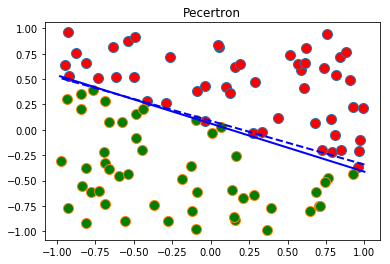

In [8]:
from perceptron import perceptron

nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 1000 # number of training data
def cal_error(w, X, y):
    number_of_sample = X.shape[1]
    D = np.vstack((np.ones((1, number_of_sample)), X))
    predict = np.sign(np.matmul(w.T, D))
    
    error = np.sum(predict != y)
    return error / number_of_sample

total_test_error = 0
total_train_error = 0
total_iters = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    
    X_train = X[:, : nTrain]
    y_train = y[:, : nTrain]
    
    X_test = X[:, nTrain:]
    y_test = y[:, nTrain:]
    
    w_g, iters = perceptron(X_train, y_train)
    # Compute training, testing error
    train_error = cal_error(w_g, X_train, y_train)
    
    test_error = cal_error(w_g, X_test, y_test)
    
    total_test_error += test_error
    total_train_error += train_error
    total_iters += iters
    # Sum up number of iterations

E_train = total_train_error / nRep
E_test = total_test_error / nRep
avgIter = total_iters / nRep

print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X_train, y_train, w_f, w_g, 'Pecertron')

### Part2: Preceptron: Non-linearly separable case

E_train is 0.22807999999999956, E_test is 0.239195
Average number of iterations is 5000.0.


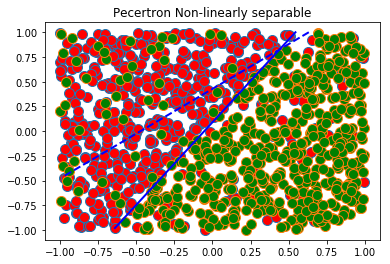

In [9]:
nRep = 1000 # number of replicates
nTrain = 100 # number of training data
nTest = 1000 # number of training data
total_test_error = 0
total_train_error = 0
total_iters = 0
for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, 'noisy')

    X_train = X[:, : nTrain]
    y_train = y[:, : nTrain]

    X_test = X[:, nTrain:]
    y_test = y[:, nTrain:]

    w_g, iters = perceptron(X_train, y_train)

    train_error = cal_error(w_g, X_train, y_train)

    test_error = cal_error(w_g, X_test, y_test)
    
    total_test_error += test_error
    total_train_error += train_error
    total_iters += iters
    
E_train = total_train_error / nRep
E_test = total_test_error / nRep
avgIter = total_iters / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))
print('Average number of iterations is {}.'.format(avgIter))
plotdata(X_train, y_train, w_f, w_g, 'Pecertron Non-linearly separable')


### Part3: Linear Regression

E_train is 0.038900000000000004, E_test is 0.048392


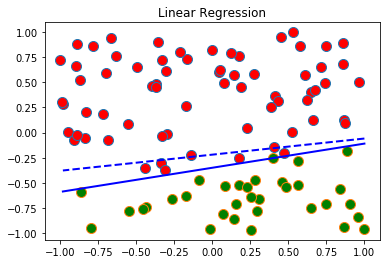

In [80]:
from linear_regression import linear_regression

nRep = 1000  # number of replicates
nTrain = 100 # number of training data
nTest = 1000


total_test_error = 0
total_train_error = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest)
    
    X_train = X[:, : nTrain]
    y_train = y[:, : nTrain]

    X_test = X[:, nTrain:]
    y_test = y[:, nTrain:]
    
    w_g = linear_regression(X_train, y_train)
    
    # Compute training, testing error

    train_error = cal_error(w_g, X_train, y_train)
    test_error = cal_error(w_g, X_test, y_test)
    total_test_error += test_error
    total_train_error += train_error

E_train = total_train_error / nRep
E_test = total_test_error / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))

# w_g = np.max(w_g, axis=1).reshape((-1,1))
plotdata(X_train, y_train, w_f, w_g, 'Linear Regression');


## Part4: Linear Regression: noisy

E_train is 0.1314500000000001, E_test is 0.14390600000000026


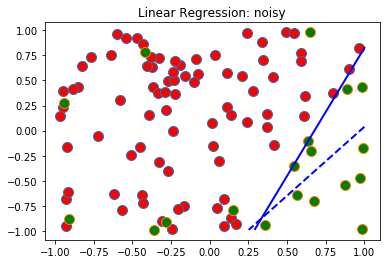

In [81]:

nRep = 1000; # number of replicates
nTrain = 100; # number of training data

total_test_error = 0
total_train_error = 0

for i in range(nRep):
    X, y, w_f = mkdata(nTrain + nTest, "noisy")
    
    X_train = X[:, : nTrain]
    y_train = y[:, : nTrain]

    X_test = X[:, nTrain:]
    y_test = y[:, nTrain:]
    
    w_g = linear_regression(X_train, y_train)
    
    # Compute training, testing error

    train_error = cal_error(w_g, X_train, y_train)
    test_error = cal_error(w_g, X_test, y_test)
    total_test_error += test_error
    total_train_error += train_error

E_train = total_train_error / nRep
E_test = total_test_error / nRep
print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X_train, y_train, w_f, w_g, 'Linear Regression: noisy');

## Part5: Linear Regression: poly_fit

In [82]:
import scipy.io as sio
poly_train = sio.loadmat('poly_train')
X, y = poly_train['X'], poly_train['y']
poly_test = sio.loadmat('poly_test')
X_test, y_test = poly_test['X_test'], poly_test['y_test']
w = linear_regression(X, y)
# Compute training, testing error
E_train = cal_error(w, X, y)
E_test = cal_error(w, X_test, y_test)
print('E_train is {}, E_test is {}'.format(E_train, E_test))

# poly_fit with transform
X_t = np.vstack((X, np.zeros((3, X.shape[1]))))  # CHANGE THIS LINE TO DO TRANSFORMATION
for i in range(X_t.shape[1]):
    X_t[2, i] = X_t[0, i] *  X_t[1, i]
    X_t[3, i] = X_t[0, i] *  X_t[0, i]
    X_t[4, i] = X_t[1, i] *  X_t[1, i]

X_test_t = X_test  # CHANGE THIS LINE TO DO TRANSFORMATION
X_test_t = np.vstack((X_test, np.zeros((3, X_test.shape[1]))))  # CHANGE THIS LINE TO DO TRANSFORMATION
for i in range(X_test_t.shape[1]):
    X_test_t[2, i] = X_test_t[0, i] *  X_test_t[1, i]
    X_test_t[3, i] = X_test_t[0, i] *  X_test_t[0, i]
    X_test_t[4, i] = X_test_t[1, i] *  X_test_t[1, i]

w = linear_regression(X_t, y)

# Compute training, testing error
E_train = cal_error(w, X_t, y)
E_test = cal_error(w, X_test_t, y_test)
print('E_train is {}, E_test is {}'.format(E_train, E_test))

E_train is 0.49, E_test is 0.5496
E_train is 0.05, E_test is 0.066


## Part6: Logistic Regression

In [ ]:
from logistic import logistic

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g = logistic(X, y);
    # Compute training, testing error

# print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression')

## Part7: Logistic Regression: noisy

In [ ]:

# Since logistic regression outputs 0/1, we should adjust the label y.
nRep = 100; # number of replicates
nTrain = 100; # number of training data
nTest = 10000; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain, 'noisy')
    w_g = logistic(X, y)
    # Compute training, testing error

# print('E_train is {}, E_test is {}'.format(E_train, E_test))

plotdata(X, y, w_f, w_g, 'Logistic Regression: noisy')

## Part8: SVM

In [ ]:
from svm import svm

nRep = 1000; # number of replicates
nTrain = 100; # number of training data

for i in range(nRep):
    X, y, w_f = mkdata(nTrain)
    w_g, num_sc = svm(X, y)
    # Compute training, testing error
    # Sum up number of support vectors

# print('E_train is {}, E_test is {}'.format(E_train, E_test))
# print('Average number of support vectors is {}.'.format(avgNum))
plotdata(X, y, w_f, w_g, 'SVM')

You can also try SVM with **noisy** training data. Why it behaves poorly? 
You can also try to implement SVM with **slack variables**.  See how it behaves with noisy training data. However this is left as a bonus part.